#  로지스틱 회귀: 시험 합격 확률 
- 로지스틱 회귀 개념
- 공부한 시간과 합격할 확률 관계
- 남여 성별 분류 문제
- 분류 확률 predict_proba() 이해
- 리콜-정밀도 선택 방법
- 소프트맥스 함수 이해

# 데이터
## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams.update({'font.size': 15})

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

## 공부한 시간
- 합격자, 불합격자의 공부한 시간 데이터 : X1

In [3]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [4]:
len(pass_time), len(fail_time)

(18, 16)

In [5]:
X1= np.concatenate((pass_time,fail_time))
X1

array([ 8. ,  9. ,  9. ,  9.5, 10. , 12. , 14. , 14.5, 16. , 16. , 16.5,
       17. , 17. , 17. , 17.5, 20. , 20. , 20. ,  1. ,  2. ,  2.1,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,  3.6,  3. ,  5. ,  5.2,
        5.4])

## 합격/불합격 레이블: y

In [6]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.concatenate((y1,y0))
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## 산포도

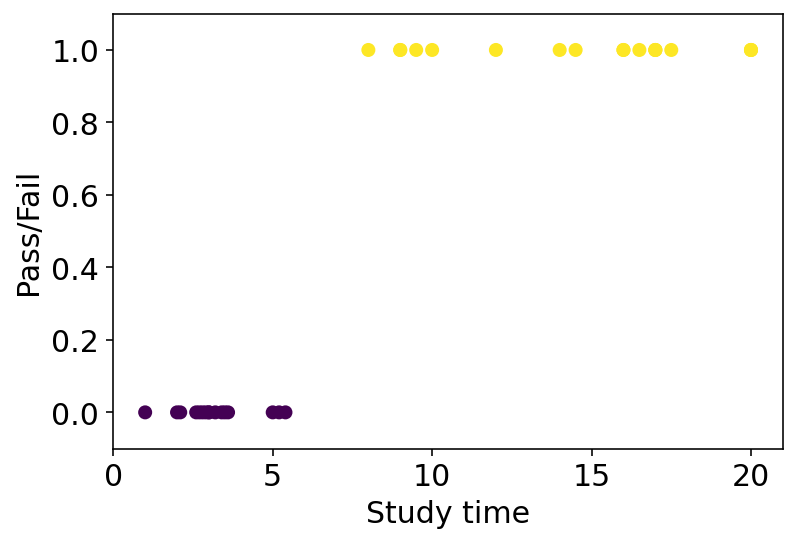

In [7]:
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass/Fail")
plt.scatter(X1, y, c=y)
plt.show()

# 모델


In [8]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X1.reshape(-1,1),y) # (2) 학습
print(model.coef_)
print(model.intercept_)

[[1.32947604]]
[-9.18521575]


## 시그모이드 함수
- 로지스틱 회귀모델은 시그모이드 함수로 모델링한다 (선형 모델은 직선을 사용)
- "회귀"모델이지만 확률을 예측하므로 분류에서 주로 사용된다

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.11.56.png?raw=1" align='left'  width=400>

## 확률 p인 사건의 가치 (score)

- $log$(${1}\over{p}$) = $log$(1 + $e ^ {-s}$) $\propto$ $log$($e ^ {-s}$) = $-s$
- 확률 $p$ $\propto$ $e ^ {s}$
- 즉, 선형적인 값(score)과 확률(p)의 관계는 로그와 exp 의 관계이다

## 시그모이드 함수의 특성

In [9]:
def logreg(z):
    return 1 /(1+np.exp(-z)) # e^^z

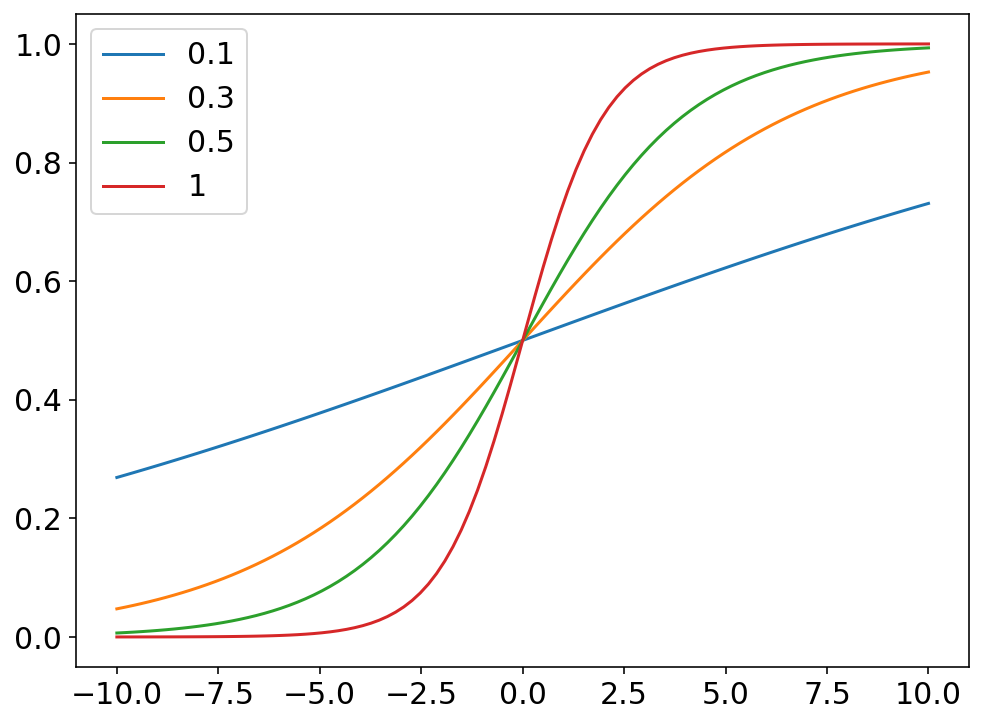

In [10]:
a_list = [0.1,0.3, 0.5, 1]
b = 0
xs = np.linspace(-10, 10, 100)

for a in a_list:
  ys = logreg(a*xs + b)
  plt.plot(xs, ys, label=a)
plt.legend()

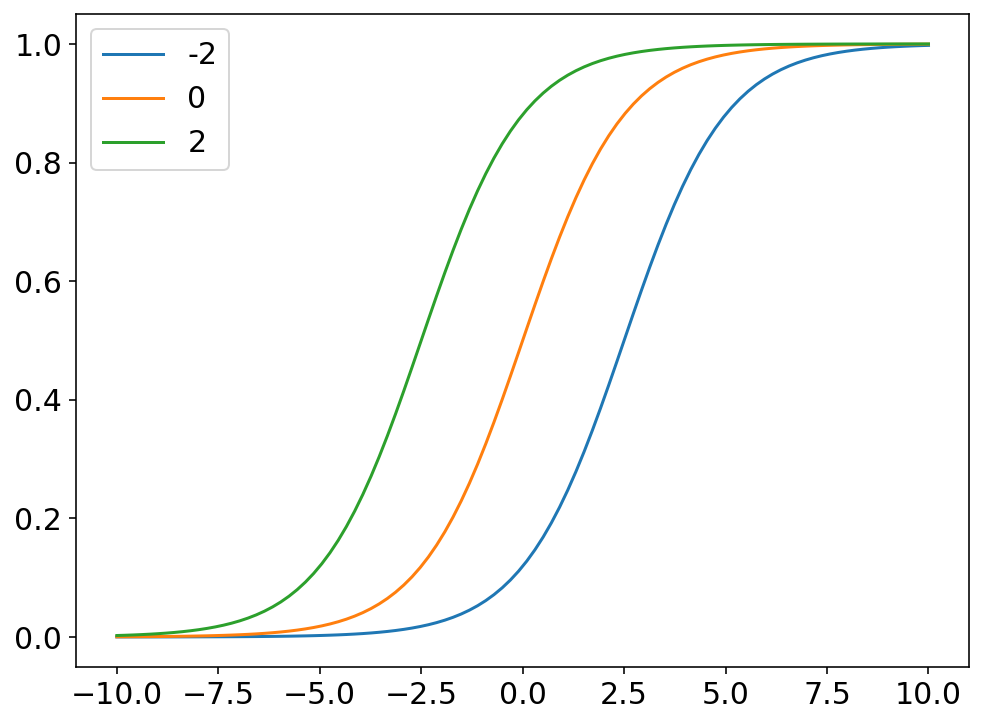

In [11]:
a = 0.8
b_list = [-2, 0, 2]
xs = np.linspace(-10, 10, 100)
for b in b_list: 
    ys = logreg(a*xs + b)
    plt.plot(xs, ys, label=b)
plt.legend()

## 모델 결과

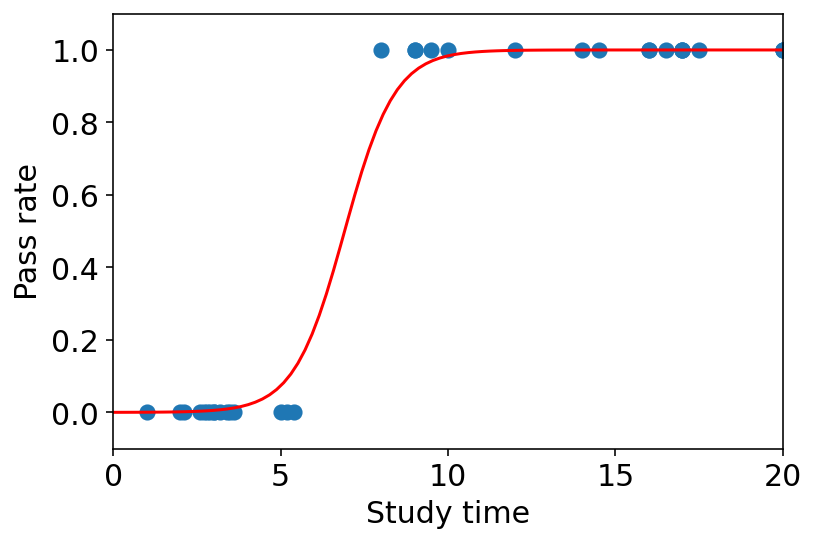

In [12]:
a, b = model.coef_[0][0], model.intercept_[0]
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X1, y, s=50)
xs = np.linspace(0,21,100)
ys = logreg(a*xs + b) # y = ax + b
plt.plot(xs, ys, c='r')
plt.show()

- 모델 사용

In [13]:
x_test = [[1.2],[8.8],[7.5]]
model.predict(x_test) # (3) 모델 사용

array([0, 1, 1])

## 분류 확률
- 로지스틱 회귀는 이진 분류 예측을 하며 분류 확률값을 제공한다
- predict_proba() 사용
- 참고로 선형계열 모델에서는 decision_function()으로 점수를 제공했다

In [14]:
model.predict_proba(x_test).round(3)

array([[0.999, 0.001],
       [0.075, 0.925],
       [0.313, 0.687]])

## (연습) 합격자, 불합격의 공부시간을 변경해본다.
- 많이 공부하고도 불합결할 수 있고, 적게 공부하고도 합격할 수 있는 경우

In [74]:
# (풀이)



# 다중변수

- 게임한 시간도 같이 고려하는 경우

In [63]:
# 합격자, 불합격자 수는 동일 해야 함
pass_time_game = [1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_game = [16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]
len(pass_time_game), len(fail_time_game)

(18, 16)

In [64]:
X2= np.concatenate((pass_time_game,fail_time_game));X2

array([ 1.5,  2. ,  2.1,  2.6,  2.1,  2.8,  2.9,  3. ,  3.2,  3.4,  3.5,
        3.6,  3. ,  5. ,  5.2,  5.4,  1.3,  1.2, 16. , 17. , 16. , 17. ,
       10. , 12. , 14. , 14.5, 15. , 16. , 16. , 16.5, 17. , 17. , 17. ,
       18.1])

- 데이터
 - 공부시간, 게임시간 취합

In [65]:
X = pd.DataFrame(list(zip(X1, X2))) ;X[:10]

,0,1
0,8.0,1.5
1,9.0,2.0
2,9.5,2.1
3,6.0,2.6
4,10.0,2.1
5,12.0,2.8
6,14.0,2.9
7,14.5,3.0
8,16.0,3.2
9,16.0,3.4


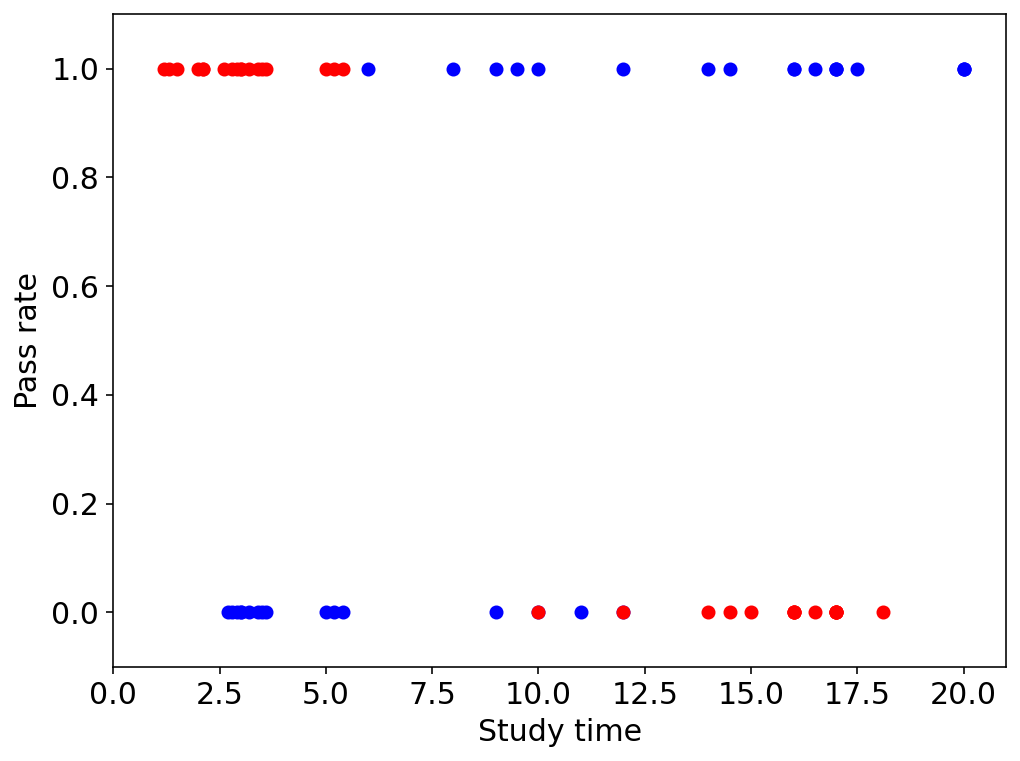

In [66]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
# plt.scatter(X1, y, c=y)
plt.scatter(X[0], y, c='b')
plt.scatter(X[1], y, c='r')
plt.show()

In [67]:
X.shape

(34, 2)

In [68]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X,y) # (2) 학습 (컬럼이 2개))

print(model.coef_)
print(model.intercept_)

[[ 0.36181309 -0.74869124]]
[3.26520677]


In [69]:
model.predict_proba([[1.2,5.5],[8.8,1.9],[20,30]])

array([[6.03104951e-01, 3.96895049e-01],
       [6.51799854e-03, 9.93482001e-01],
       [9.99993600e-01, 6.39960015e-06]])

- 게임한 시간을 고정하여 그래프 그리기 (공부한 시간대비 합격할 확률)
- 게임한 시간을 6,8, 10 시간으로 고정함

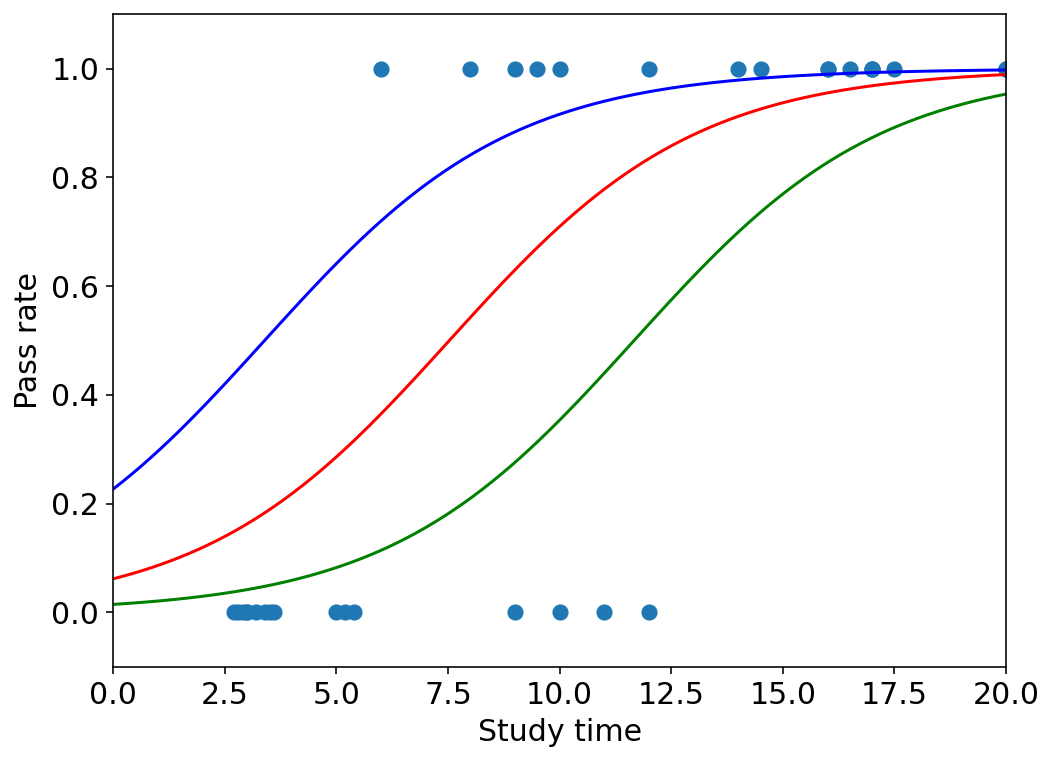

In [70]:
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
xs = np.linspace(0,21, 100)
ys = logreg(a1*xs +a2*6+ b)
plt.plot(xs, ys, c='b')
ys = logreg(a1*xs +a2*8+ b)
plt.plot(xs, ys, c='r')
ys = logreg(a1*xs +a2*10+ b)
plt.plot(xs, ys, c='g')
plt.show()

## (연습) 게임한 시간이 매우 적거나 큰 경우의 결과 비교


In [75]:
# (풀이)



# 성별 분류 문제

## 데이터 읽기

In [23]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


## 데이터 나누기
- 성별  예측
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [24]:
X = data[["Height", "Weight"]]
y = data.Gender

## 스케일링

In [25]:
X_sc = X.copy()
scaler = StandardScaler()
X_sc.loc[:,:] = scaler.fit_transform(X_sc)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((7500, 2), (2500, 2), (7500,), (2500,))

## 로지스틱 회귀를 이용한 이진 분류

In [26]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 학습

LogisticRegression()

In [27]:
def show_clf_result(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [28]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1179  106]
 [ 107 1108]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1285
           1       0.91      0.91      0.91      1215

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



## 분류 확률
- 선형계열 모델의 점수대신 1로 분류할 확률을 점수로 사용할 수 있다
- 이를 이용하여 랭킹 평가가 가능하고, 임의의 리콜, 정밀도를 선택할 수 있다

- 분류 결과가 여성(1)일 확률

In [29]:
proba_1 = model.predict_proba(X_test)[:,1]
proba_1

array([0.00417389, 0.96606573, 0.88231778, ..., 0.07593385, 0.04352201,
       0.99210792])

In [30]:
proba_1.min(), proba_1.max()

(1.4813931999503283e-06, 0.9999956474262693)

- 여러가지 분류 확률 경계값을 사용할 때의 리콜,정밀도 보기

In [31]:
proba_range = np.linspace(0, 0.9, 10)

result = []
for prob_thres in list(proba_range):
    y_pred_i = proba_1 > prob_thres
    result.append((prob_thres, precision_score(y_test, y_pred_i), recall_score(y_test, y_pred_i)))

<AxesSubplot:xlabel='threshold'>

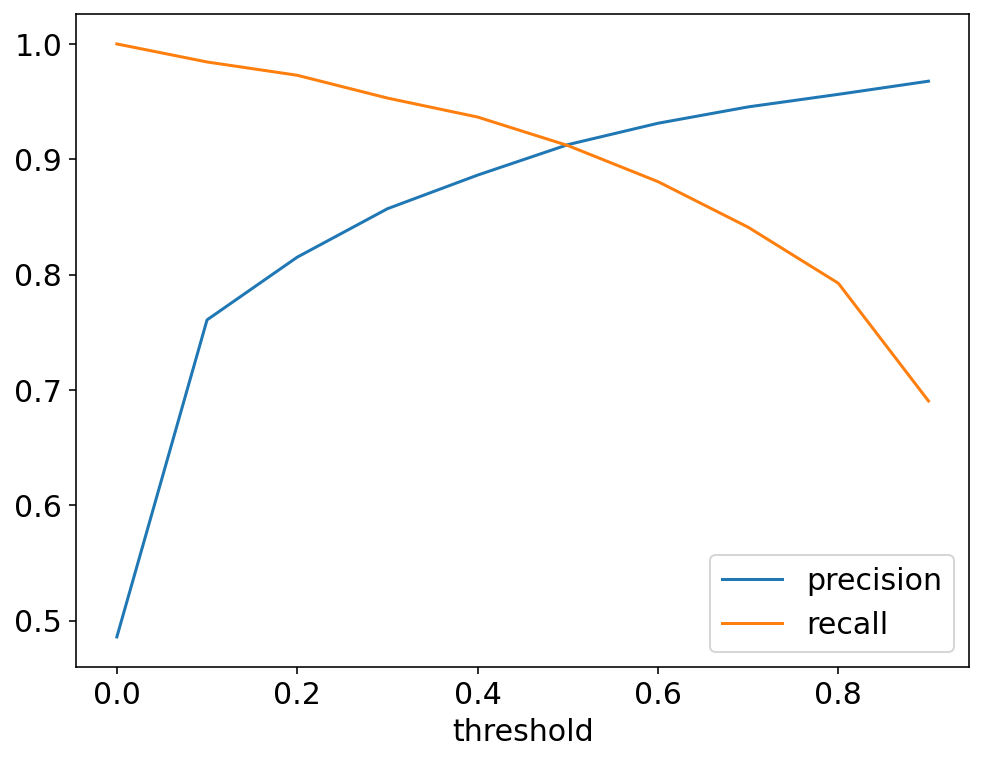

In [33]:
df_r = pd.DataFrame(result, columns=['threshold','precision', 'recall'])
df_r[::-1]

In [ ]:
df_r.set_index('threshold').plot()

Text(0, 0.5, 'precision')

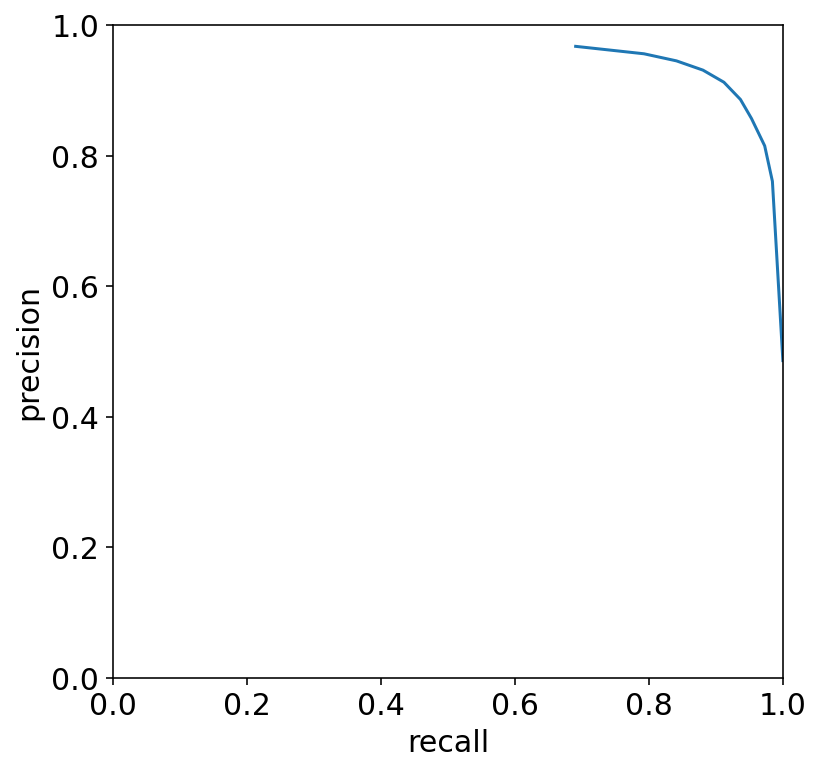

In [34]:
plt.figure(figsize=(6,6))

plt.plot(df_r.recall, df_r.precision)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("recall")
plt.ylabel("precision")

## (연습) 분류 확률 경계값을 100개의 등급으로 세분화 하시오
- 위에서는 경계값의 종류를 10개를 사용했는데 이를 100개로 세등분하여 테이블을 만드시오

In [76]:
# (풀이)



## 샘플기준 Precision-Recall 커브 그리기
- 모든 테스트 샘플을 이용하여 Precision-Recall 커브 그리기 (100개의 경계값 설정 등이 아니라)
- precision_recall_curve 함수를 이용한다
 - 미리 점수순으로 소팅하지 않아도 된다. 샘플 행별로 실제값과 점수를 사용하여 내부적으로 소팅하여 그림을 그린다

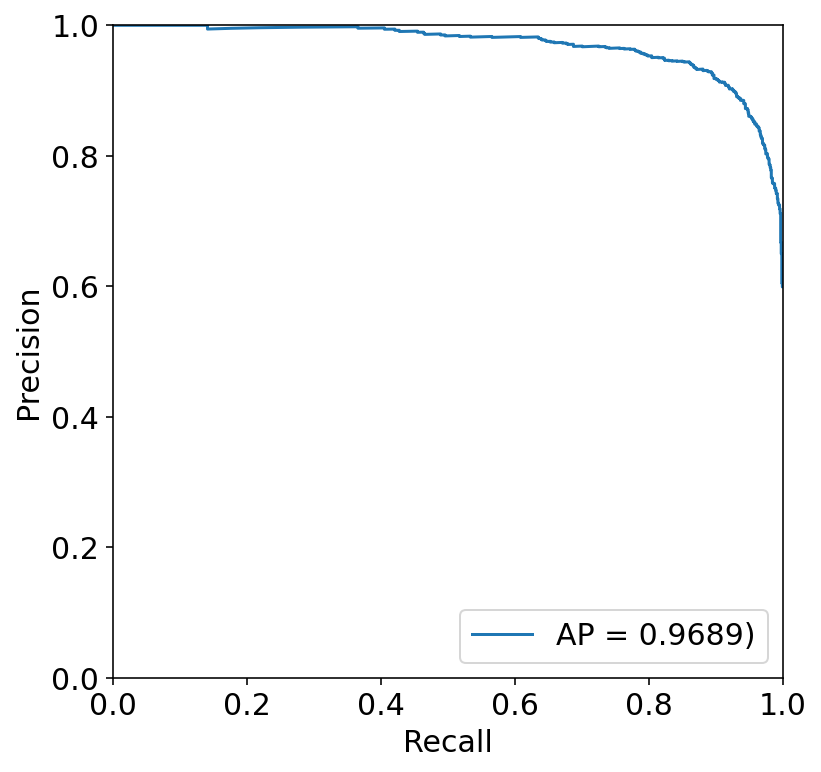

In [39]:
prec, rcl, thres = precision_recall_curve(y_test, proba_1)
ap = average_precision_score(y_test, proba_1)
plt.figure(figsize=(6,6))
plt.plot(rcl, prec, label='AP = %0.4f)' % ap)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower right")

# 소프트맥스

- 로지스틱 회귀 모델은 이진 분류만 가능하다
- 3개 이상의 분류에 로지스틱 회귀 방법 (시그모이드 함수 매핑)을 적용할 때 소프트맥스 기법을 사용한다
- 다항 로지스틱스라고도 한다
- 분류 모델이 계산으로 얻은 선형적인 값을 확률 값으로 매핑하는데 소프트맥스가 널리 사용된다.


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.25.18.png?raw=1" align='left'  width=400>

In [40]:
# 소프트맥스 구현(계산식)
score = [11,2,3,4,5] # 선형 세계의 점수
prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.996 0.    0.    0.001 0.002]


# 정답

## (연습) 합격자, 불합격의 공부시간을 변경해본다.
- 많이 공부하고도 불합결할 수 있고, 적게 공부하고도 합격할 수 있는 경우

In [61]:
pass_time = [8,9, 9.5, 6, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [9,10, 11,12,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

X1= np.concatenate((pass_time,fail_time))
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.concatenate((y1,y0))

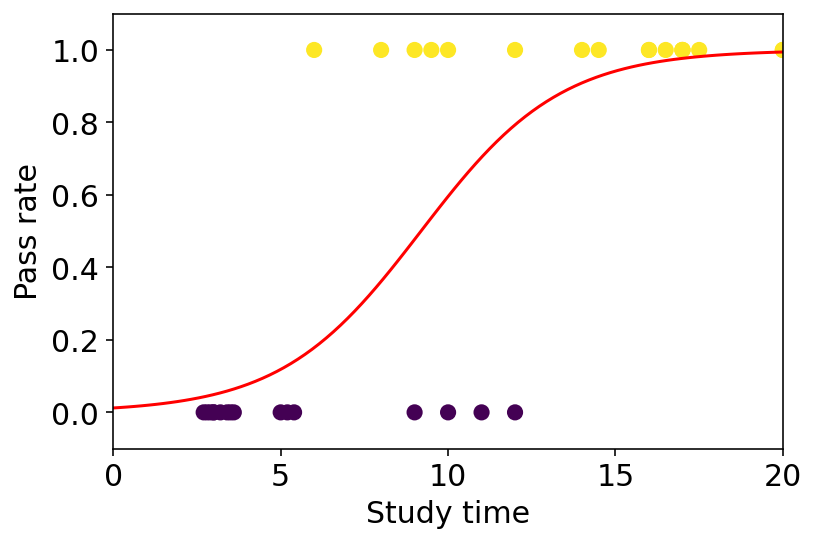

In [62]:
model = LogisticRegression() # (1) 모델 생성
model.fit(X1.reshape(-1,1),y) # (2) 학습

a, b = model.coef_[0][0], model.intercept_[0]
fig = plt.figure(figsize=(6,4))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X1, y, s=50, c=y)
xs = np.linspace(0,21,100)
ys = logreg(a*xs + b) # y = ax + b
plt.plot(xs, ys, c='r')
plt.show()

## (연습) 게임한 시간이 매우 적거나 큰 경우의 결과 비교


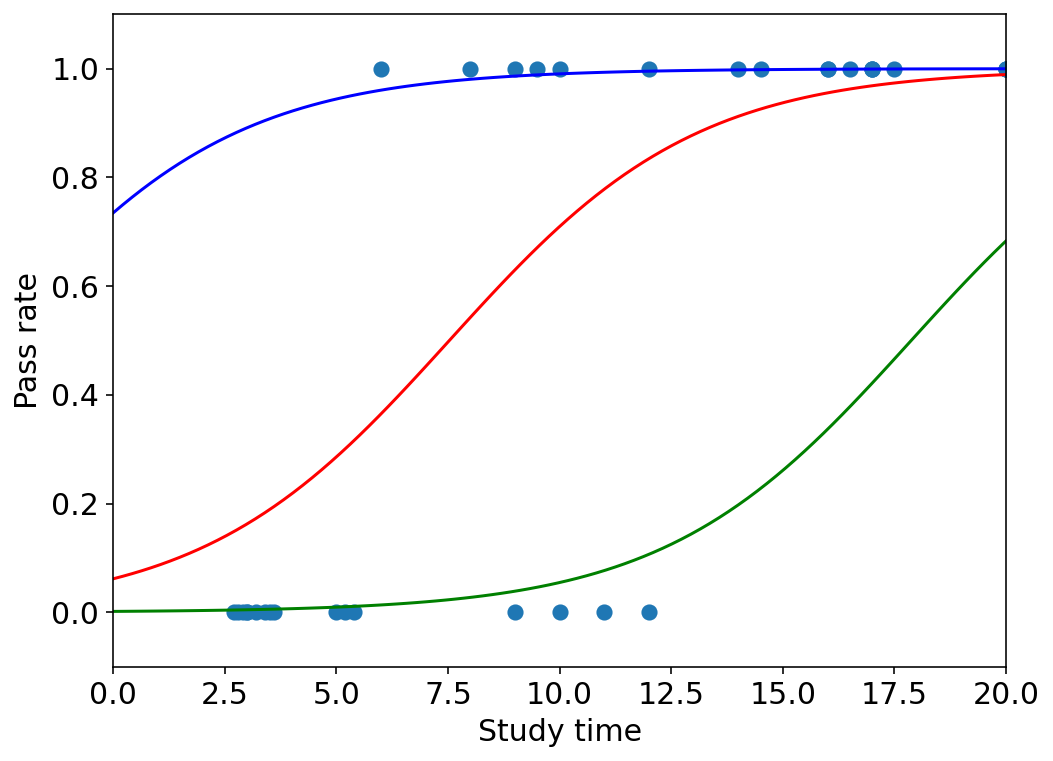

In [73]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
xs = np.linspace(0,21, 100)
ys = logreg(a1*xs +a2*3+ b)
plt.plot(xs, ys, c='b')
ys = logreg(a1*xs +a2*8+ b)
plt.plot(xs, ys, c='r')
ys = logreg(a1*xs +a2*13+ b)
plt.plot(xs, ys, c='g')
plt.show()

## (연습) 분류 확률 경계값을 100개의 등급으로 세분화 하시오
- 위에서는 경계값의 종류를 10개를 사용했는데 이를 100개로 세등분하여 테이블을 만드시오

<AxesSubplot:xlabel='threshold'>

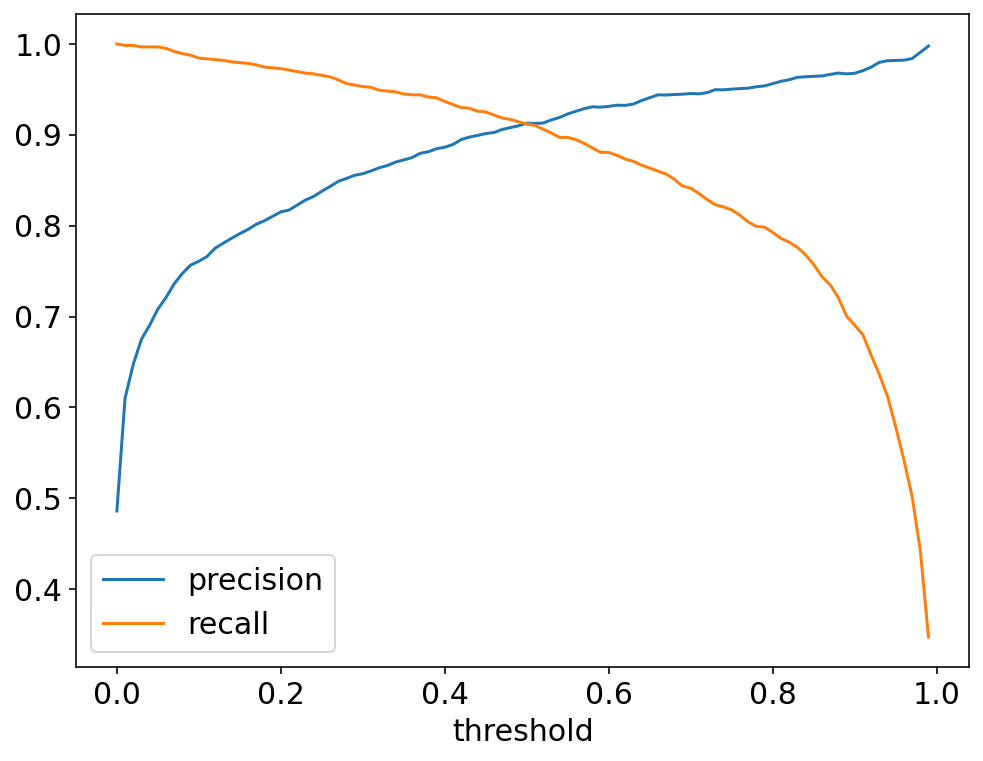

In [36]:
proba_range = np.linspace(0, 0.99, 100)

result = []
for prob_thres in list(proba_range):
    y_pred_i = proba_1 > prob_thres
    result.append((prob_thres, precision_score(y_test, y_pred_i), recall_score(y_test, y_pred_i)))

df_r = pd.DataFrame(result, columns=['threshold','precision', 'recall'])
df_r.set_index('threshold').plot()

In [38]:
df_r[::-1]

,threshold,precision,recall
99,0.99,0.997636,0.347325
98,0.98,0.990792,0.442798
97,0.97,0.983871,0.502058
96,0.96,0.982116,0.542387
95,0.95,0.981844,0.578601
...,...,...,...
4,0.04,0.690422,0.996708
3,0.03,0.675028,0.996708
2,0.02,0.647279,0.998354
1,0.01,0.610161,0.998354


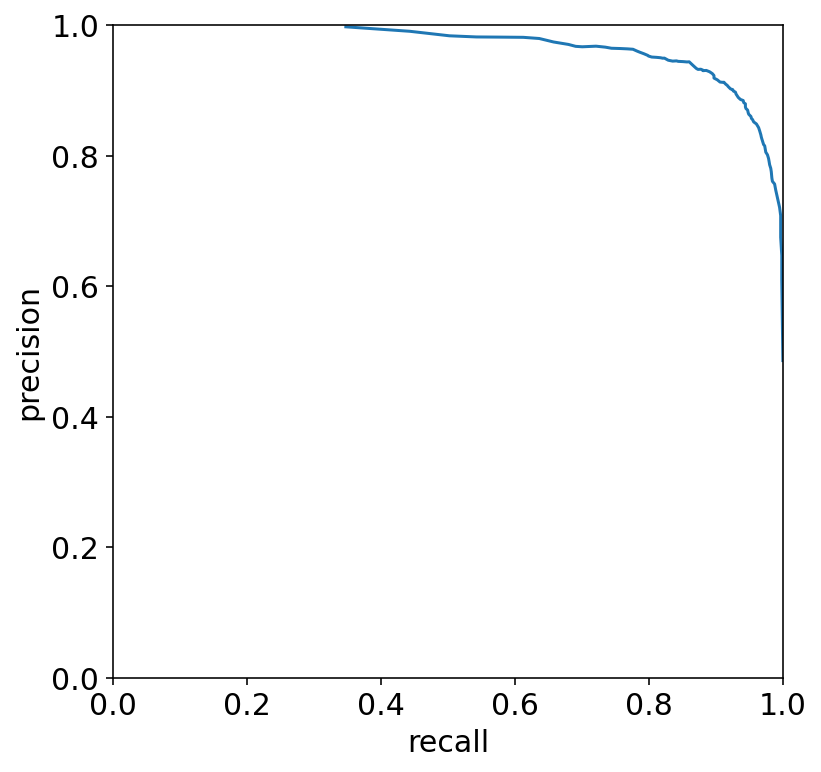

In [37]:
plt.figure(figsize=(6,6))

plt.plot(df_r.recall, df_r.precision)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()